# K Means Clustering

Here we gonna cluster Universities into to two groups, Private and Public.

**We have true labels for this dataset. But we are not going use it in our training process as it is a unsupervised algorithm. But we will use it to see our model performance.**

The classification report and confusion matrix, don't truly make sense in KMeans applications.

## The Data & columns.

Here our DataFrame contains 777 instances and 18 features.

* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Import Libraries


In [2]:
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Get the Data

**Readout the data and set the first column as the index.**

In [3]:
# Read the data and make the 1st column as index
data = pd.read_csv('College_Data', index_col= 0)

In [4]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [6]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Data Analysis

Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.

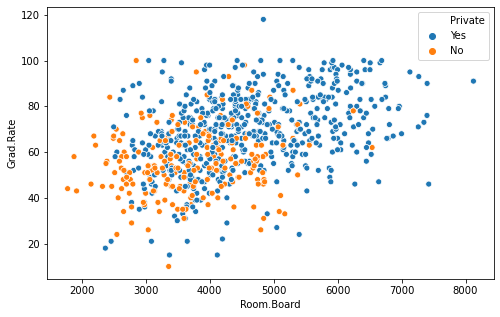

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(data = data, x = 'Room.Board', y= 'Grad.Rate', hue = 'Private')

<Figure size 576x360 with 0 Axes>

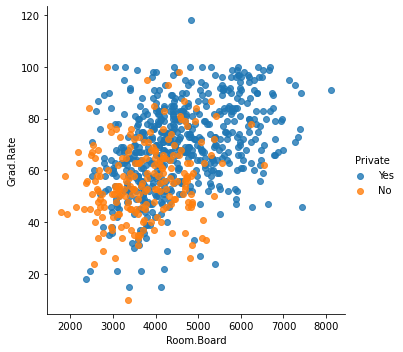

In [15]:
# We can use lmplot instead of scatterplot
plt.figure(figsize=(8,5))
sns.lmplot(data = data,x = 'Room.Board', y= 'Grad.Rate',hue = 'Private', fit_reg= False)

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

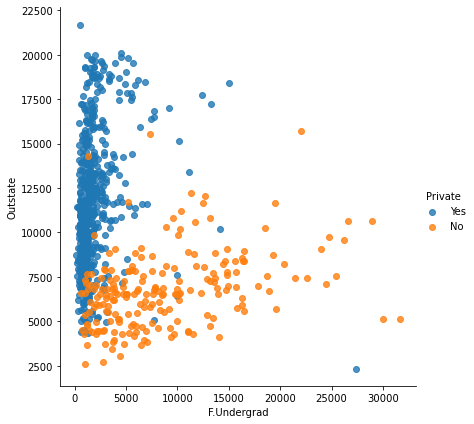

In [24]:
#sns.scatterplot(x='Outstate', y = 'F.Undergrad',data = data, hue= 'Private')
sns.lmplot(x='F.Undergrad', y = 'Outstate',data = data, hue= 'Private', fit_reg= False,height = 6)

**Create a stacked histogram showing Out of State Tuition based on the Private column. Using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html)or pandas.plot(kind='hist').**

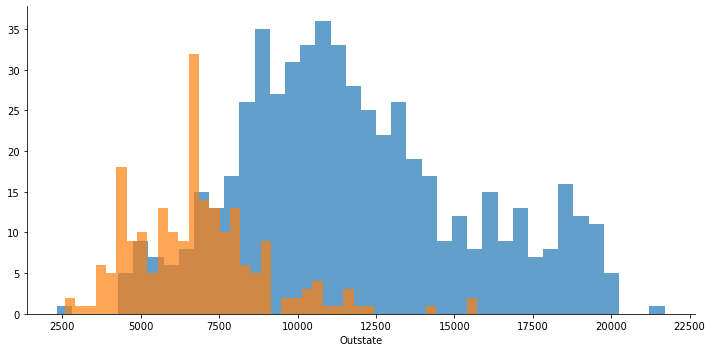

In [7]:
g = sns.FacetGrid(data, hue = 'Private',height = 5,aspect= 2)
# Now we have the obj
g= g.map(plt.hist,'Outstate', bins = 40,alpha = 0.7)

**Create a similar histogram for the Grad.Rate column.**

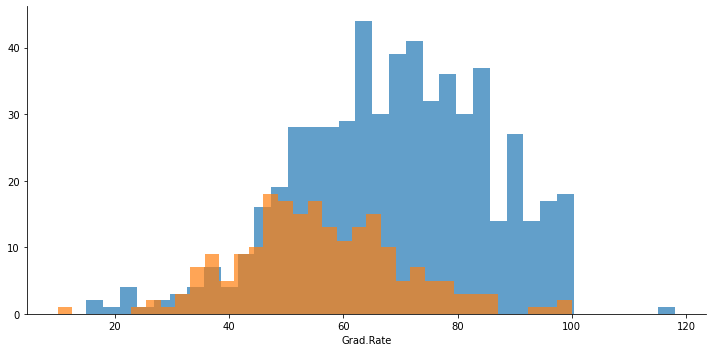

In [8]:
g = sns.FacetGrid(data,hue = 'Private',height= 5, aspect= 2)
g.map(plt.hist, 'Grad.Rate', bins = 35, alpha = 0.7)

**Notice here we have a private school with a graduation rate of higher than 100%.Lets find it out its which school.**

In [9]:
data[data['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**Now set the graduation rate to 100. You may encounter a warning saying that you may loose your data. Just ignore it.**

In [10]:
# Here we can see the  Cazenovia college have the graduation rate higher than 100, which is not appropiate.
data['Grad.Rate']['Cazenovia College'] = 100

c:\users\abhis\envs\dude\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
data.head(1)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


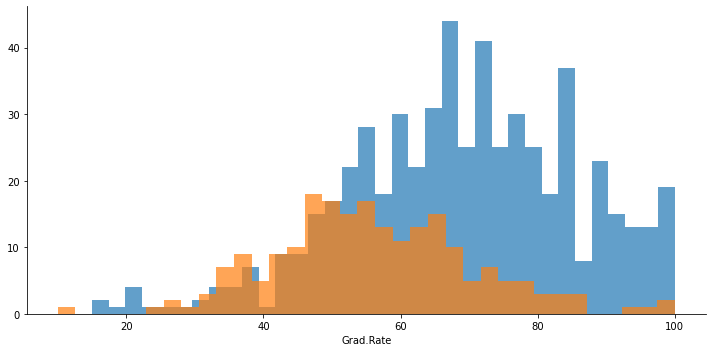

In [14]:
# Lets see again.
g = sns.FacetGrid(data,hue = 'Private',height= 5, aspect= 2)
g.map(plt.hist, 'Grad.Rate', bins = 35, alpha = 0.7)

**That's it**

## K Means Cluster(Model Craetion)


In [16]:
from sklearn.cluster import KMeans

**Create an instance of a K Means model with 2 clusters.**

In [17]:
kmeans =  KMeans(n_clusters=2)

In [18]:
#  fit all the features  except Private column

kmeans.fit(data.drop('Private',  axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
# Lets take a look on our cluster center vectors.
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Evaluation

There is no better way to evaluate the model without true labels. Though we have that lets take advantages from it.

**Lets create a new column for DataFrame(df) called 'Cluster'.**

In [20]:
def converter(private): # which is a 1 for a Private school, and a 0 for a public school.
    if private=='Yes':
        return 1
    else:
        return 0

In [21]:
data['Cluster'] = data['Private'].apply(converter)

In [22]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


**Confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.Here we are using true labels for  testing our model.**

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(data['Cluster'], kmeans.labels_))
print('\n')
print(classification_report(data['Cluster'], kmeans.labels_))

[[138  74]
 [531  34]]


              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



**Not so bad actually because our algorithm use just use provides features and it's unsupervised algoritm also.**